k-NN for k=1


Training KNN...
Accuracy: 0.3539

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.48      0.45      1000
           1       0.65      0.22      0.33      1000
           2       0.24      0.38      0.30      1000
           3       0.29      0.24      0.26      1000
           4       0.25      0.46      0.32      1000
           5       0.36      0.29      0.32      1000
           6       0.33      0.35      0.34      1000
           7       0.56      0.29      0.39      1000
           8       0.40      0.62      0.49      1000
           9       0.61      0.20      0.30      1000

    accuracy                           0.35     10000
   macro avg       0.41      0.35      0.35     10000
weighted avg       0.41      0.35      0.35     10000



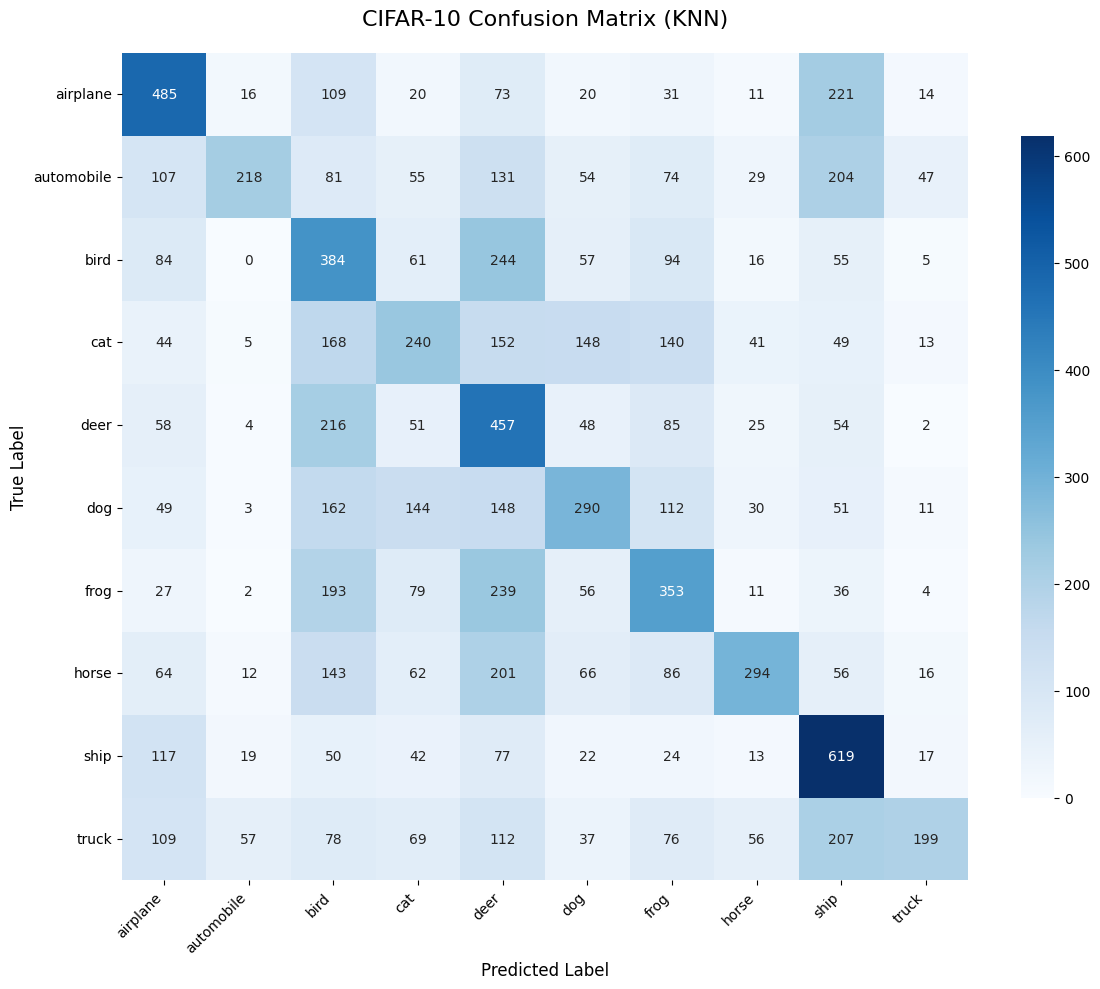

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 1️ Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

# 2️ Flatten images from (32,32,3) → (3072,)
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

# 3 Train KNN classifier
print("Training KNN...")
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_flat, y_train)   # use smaller subset for speed
y_pred = knn.predict(x_test_flat)

# 4 Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create heatmap with annotations and proper labels
sns.heatmap(cm,cmap='Blues',annot=True, # Show values in cells
            fmt='d',  # Format as integers
            xticklabels=class_names,
            yticklabels=class_names,
            annot_kws={'size': 10},  # Annotation font size
            cbar_kws={'shrink': 0.8}) # Color bar size

plt.title("CIFAR-10 Confusion Matrix (KNN)", fontsize=16, pad=20)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add grid lines for better separation
plt.grid(False)

# Ensure layout doesn't cut off labels
plt.tight_layout()
plt.show()

k-nn with k=1 and normalization

Training KNN...
Accuracy: 0.3539

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.48      0.45      1000
           1       0.65      0.22      0.33      1000
           2       0.24      0.38      0.30      1000
           3       0.29      0.24      0.26      1000
           4       0.25      0.46      0.32      1000
           5       0.36      0.29      0.32      1000
           6       0.33      0.35      0.34      1000
           7       0.56      0.29      0.39      1000
           8       0.40      0.62      0.49      1000
           9       0.61      0.20      0.30      1000

    accuracy                           0.35     10000
   macro avg       0.41      0.35      0.35     10000
weighted avg       0.41      0.35      0.35     10000



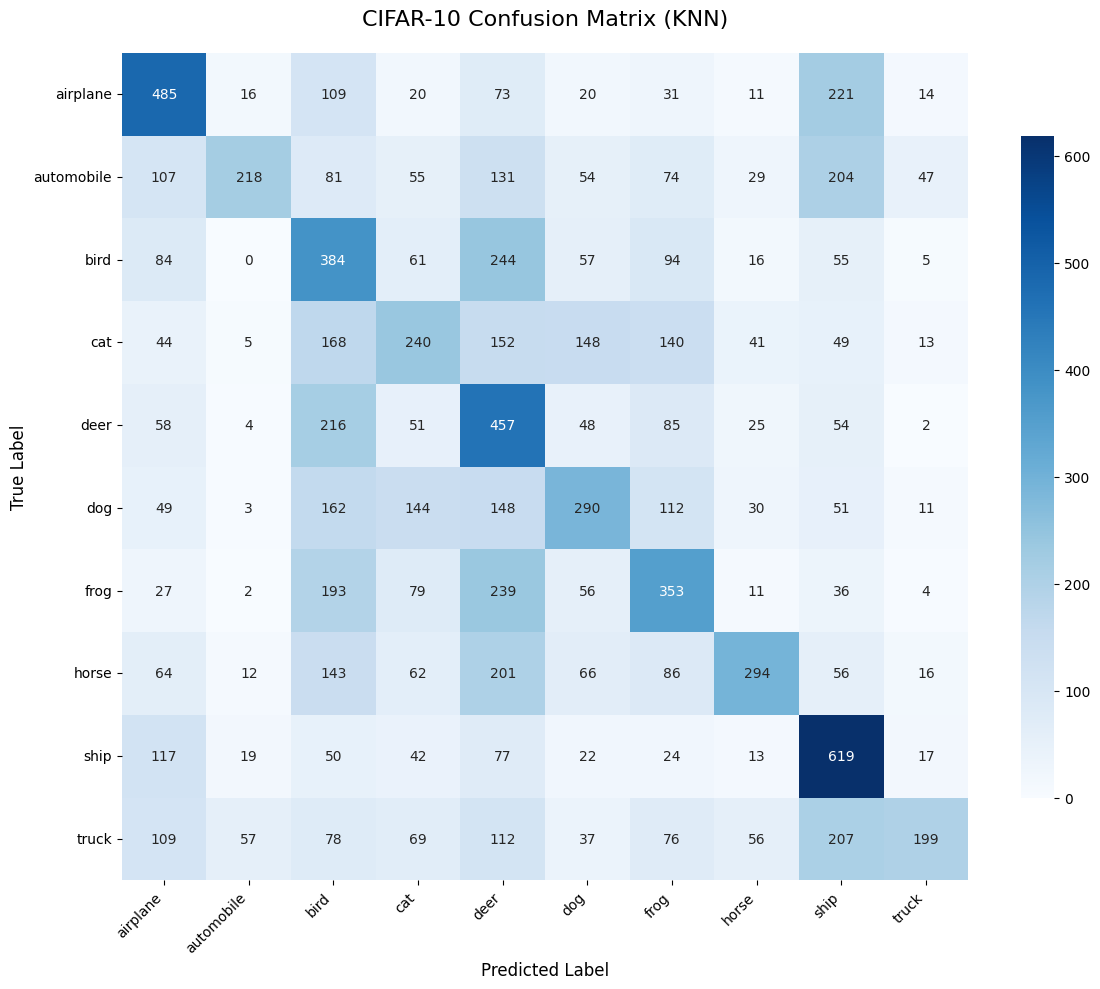

In [ ]:
# 1 Normalize pixel values
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# 2 Train KNN classifier
print("Training KNN...")
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_flat, y_train)   # use smaller subset for speed
y_pred = knn.predict(x_test_flat)

# 3 Evaluate
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create heatmap with annotations and proper labels
sns.heatmap(cm,cmap='Blues',annot=True, # Show values in cells
            fmt='d',  # Format as integers
            xticklabels=class_names,
            yticklabels=class_names,
            annot_kws={'size': 10},  # Annotation font size
            cbar_kws={'shrink': 0.8}) # Color bar size

plt.title("CIFAR-10 Confusion Matrix (KNN)", fontsize=16, pad=20)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add grid lines for better separation
plt.grid(False)

# Ensure layout doesn't cut off labels
plt.tight_layout()
plt.show()

k-nn with k=1, normalization and PCA=100

Applying PCA (100 components)...
Training KNN...
Accuracy: 0.3847

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.51      0.47      1000
           1       0.59      0.31      0.41      1000
           2       0.27      0.39      0.32      1000
           3       0.31      0.24      0.27      1000
           4       0.28      0.43      0.34      1000
           5       0.39      0.30      0.34      1000
           6       0.33      0.45      0.38      1000
           7       0.54      0.36      0.43      1000
           8       0.45      0.58      0.51      1000
           9       0.57      0.28      0.37      1000

    accuracy                           0.38     10000
   macro avg       0.42      0.38      0.38     10000
weighted avg       0.42      0.38      0.38     10000



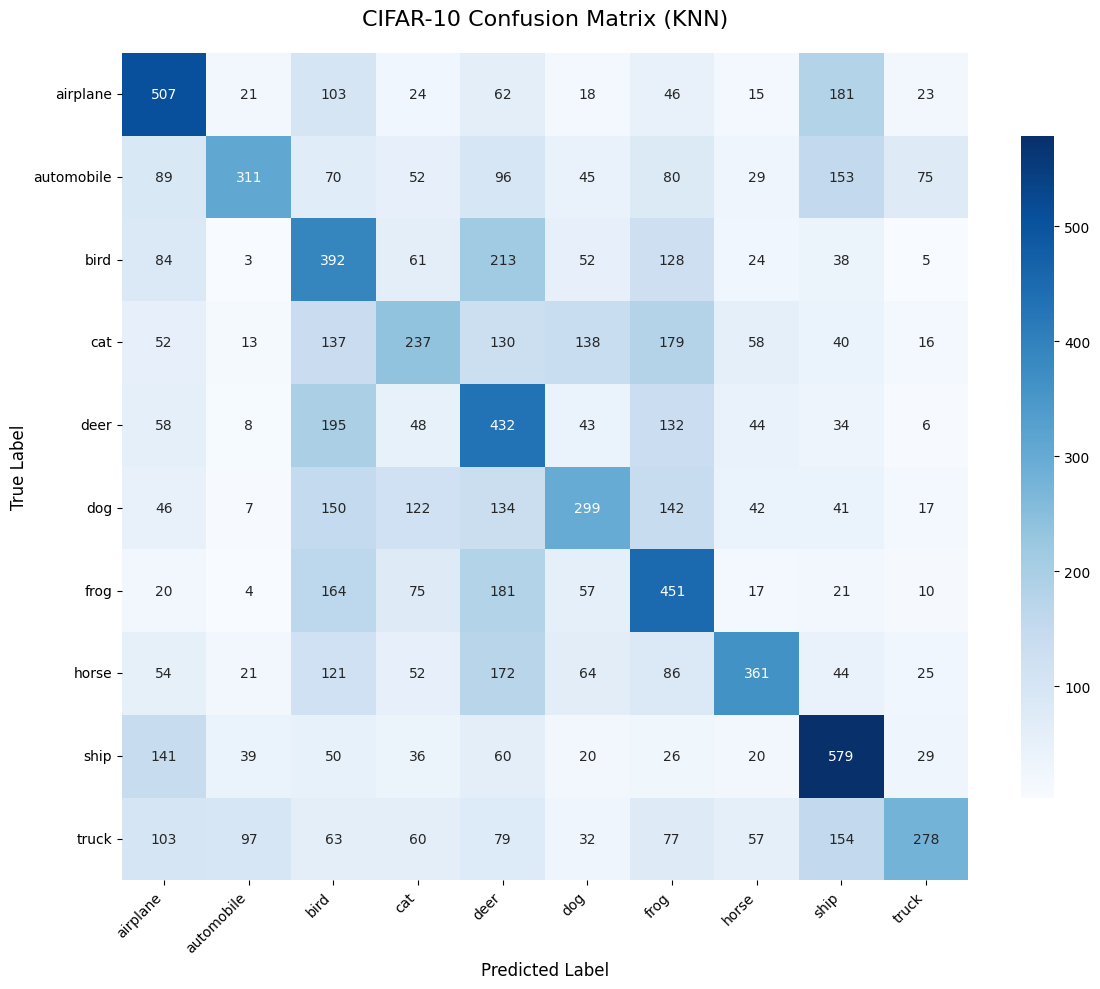

In [ ]:
# 1 Normalize pixel values
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# 2 Optional: Use PCA to reduce dimensionality
print("Applying PCA (100 components)...")
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# 3 Train KNN classifier
print("Training KNN...")
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_pca, y_train)   # use smaller subset for speed
y_pred = knn.predict(x_test_pca)

# 4 Evaluate
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create heatmap with annotations and proper labels
sns.heatmap(cm,cmap='Blues',annot=True, # Show values in cells
            fmt='d',  # Format as integers
            xticklabels=class_names,
            yticklabels=class_names,
            annot_kws={'size': 10},  # Annotation font size
            cbar_kws={'shrink': 0.8}) # Color bar size

plt.title("CIFAR-10 Confusion Matrix (KNN)", fontsize=16, pad=20)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add grid lines for better separation
plt.grid(False)

# Ensure layout doesn't cut off labels
plt.tight_layout()
plt.show()

Nearest Centroid

Training NC...
Accuracy: 0.2774

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.54      0.36      1000
           1       0.28      0.19      0.22      1000
           2       0.28      0.11      0.16      1000
           3       0.27      0.06      0.09      1000
           4       0.28      0.12      0.17      1000
           5       0.27      0.29      0.28      1000
           6       0.22      0.54      0.31      1000
           7       0.27      0.17      0.20      1000
           8       0.42      0.37      0.39      1000
           9       0.33      0.41      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



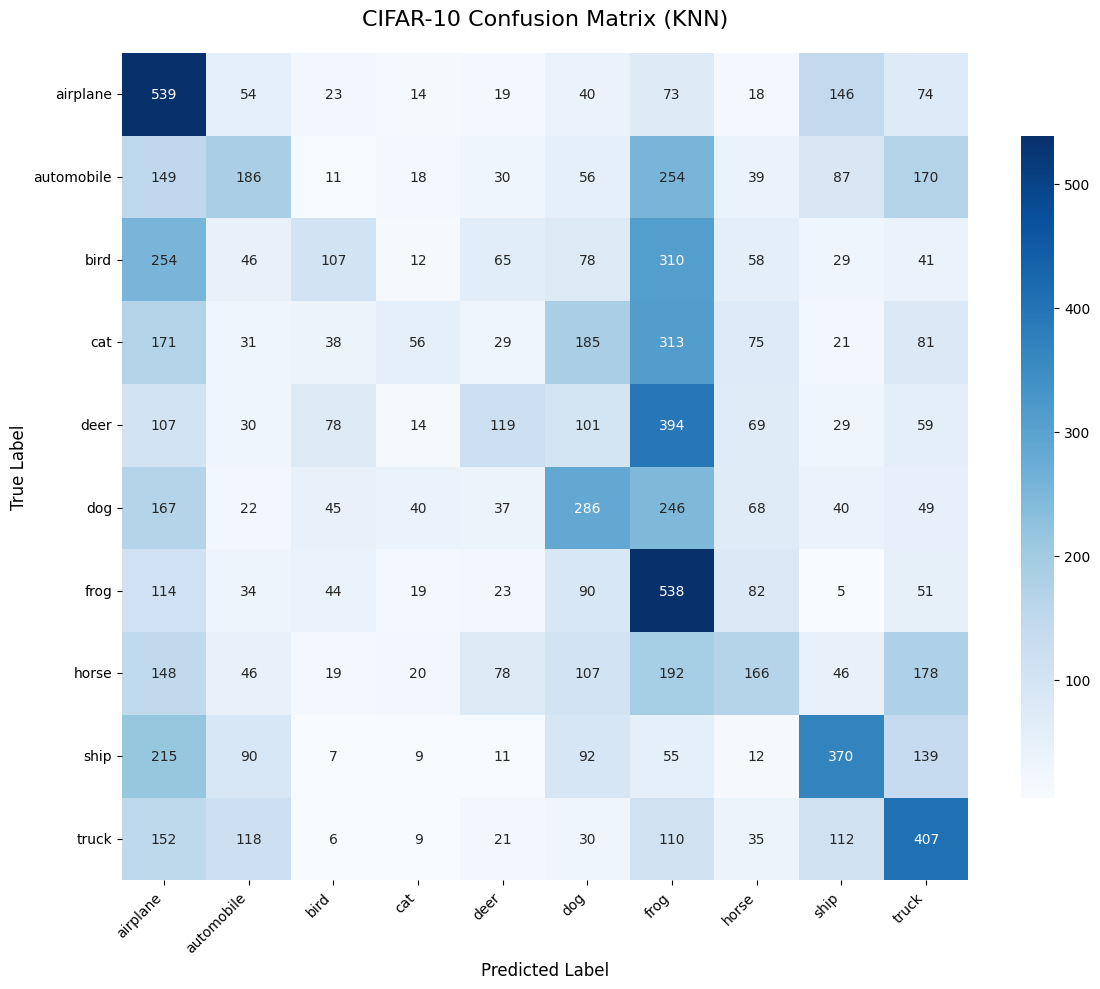

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
# 1 Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

# 2️ Flatten images from (32,32,3) → (3072,)
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

# 3 Train NC classifier
print("Training NC...")
nc = NearestCentroid()
nc.fit(x_train_flat, y_train)   # use smaller subset for speed
y_pred = nc.predict(x_test_flat)

# 4 Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.6f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create heatmap with annotations and proper labels
sns.heatmap(cm,cmap='Blues',annot=True, # Show values in cells
            fmt='d',  # Format as integers
            xticklabels=class_names,
            yticklabels=class_names,
            annot_kws={'size': 10},  # Annotation font size
            cbar_kws={'shrink': 0.8}) # Color bar size

plt.title("CIFAR-10 Confusion Matrix (KNN)", fontsize=16, pad=20)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add grid lines for better separation
plt.grid(False)

# Ensure layout doesn't cut off labels
plt.tight_layout()
plt.show()

Nearest Centroid with normalization

Training NC...
Accuracy: 0.277400

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.54      0.36      1000
           1       0.28      0.19      0.22      1000
           2       0.28      0.11      0.16      1000
           3       0.27      0.06      0.09      1000
           4       0.28      0.12      0.17      1000
           5       0.27      0.29      0.28      1000
           6       0.22      0.54      0.31      1000
           7       0.27      0.17      0.20      1000
           8       0.42      0.37      0.39      1000
           9       0.33      0.41      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



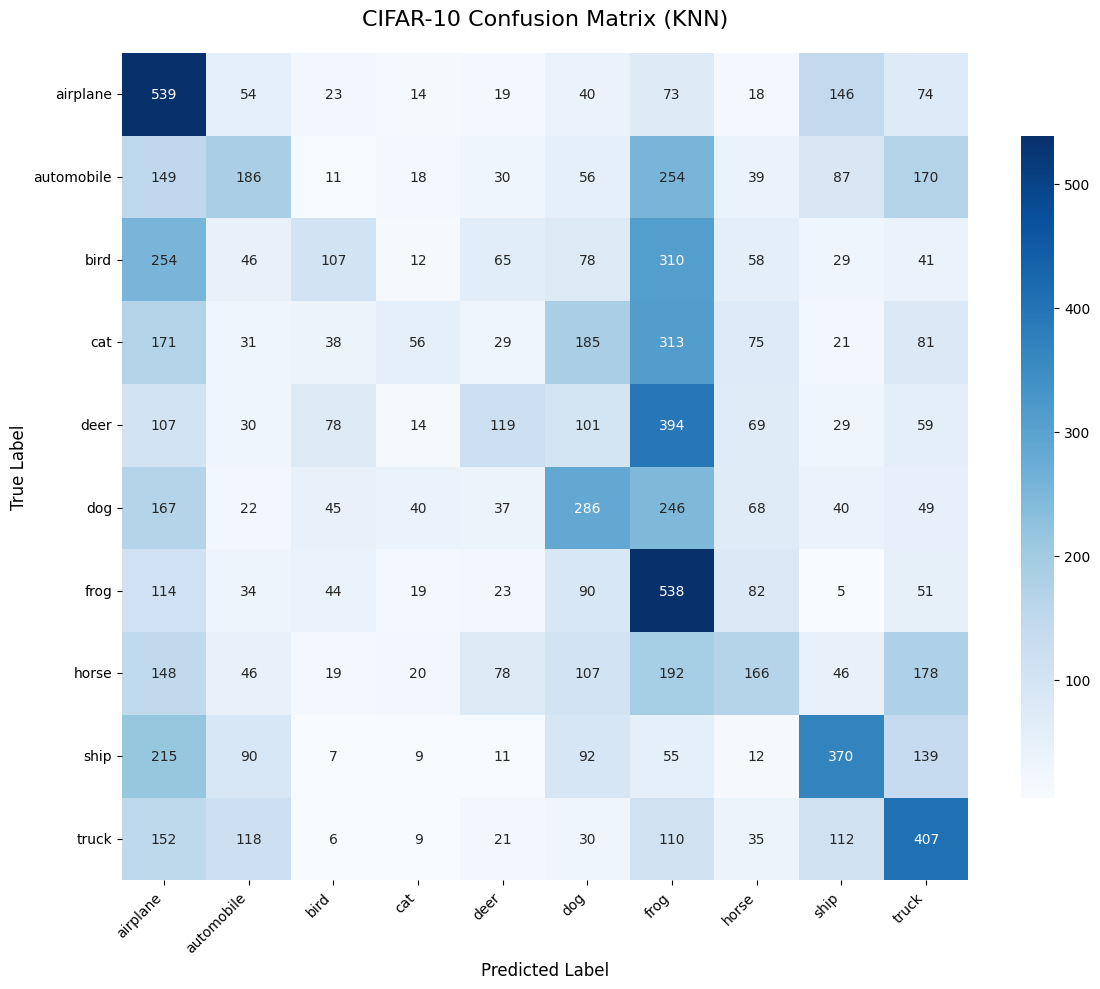

In [ ]:
# 1 Normalize pixel values
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# 2 Train NC classifier
print("Training NC...")
nc = NearestCentroid()
nc.fit(x_train_flat, y_train)   # use smaller subset for speed
y_pred = nc.predict(x_test_flat)

# 3 Evaluate
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.6f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create heatmap with annotations and proper labels
sns.heatmap(cm,cmap='Blues',annot=True, # Show values in cells
            fmt='d',  # Format as integers
            xticklabels=class_names,
            yticklabels=class_names,
            annot_kws={'size': 10},  # Annotation font size
            cbar_kws={'shrink': 0.8}) # Color bar size

plt.title("CIFAR-10 Confusion Matrix (KNN)", fontsize=16, pad=20)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add grid lines for better separation
plt.grid(False)

# Ensure layout doesn't cut off labels
plt.tight_layout()
plt.show()

Nearest Centroid normalized and PCA=100


Applying PCA (100 components)...
Training NC...
Accuracy: 0.276600

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.54      0.36      1000
           1       0.28      0.19      0.23      1000
           2       0.28      0.11      0.16      1000
           3       0.26      0.06      0.09      1000
           4       0.27      0.12      0.16      1000
           5       0.27      0.29      0.28      1000
           6       0.22      0.54      0.31      1000
           7       0.26      0.16      0.20      1000
           8       0.42      0.37      0.39      1000
           9       0.33      0.41      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



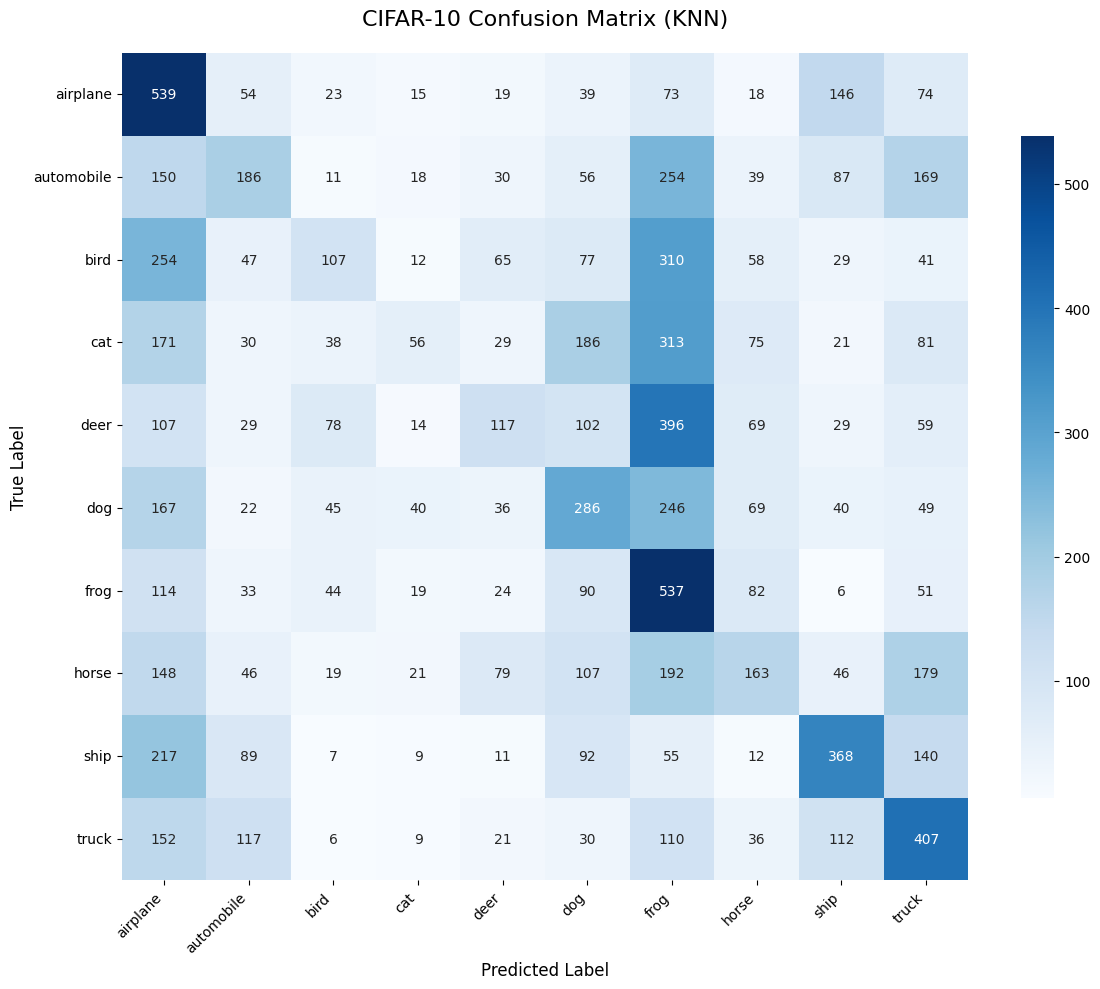

In [ ]:

# 1 Normalize pixel values
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0
# 2 Use PCA to reduce dimensionality
print("Applying PCA (100 components)...")
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# 3 Train NC classifier
print("Training NC...")
nc = NearestCentroid()
nc.fit(x_train_pca, y_train)   # use smaller subset for speed
y_pred = nc.predict(x_test_pca)

# 4 Evaluate
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.6f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create heatmap with annotations and proper labels
sns.heatmap(cm,cmap='Blues',annot=True, # Show values in cells
            fmt='d',  # Format as integers
            xticklabels=class_names,
            yticklabels=class_names,
            annot_kws={'size': 10},  # Annotation font size
            cbar_kws={'shrink': 0.8}) # Color bar size

plt.title("CIFAR-10 Confusion Matrix (KNN)", fontsize=16, pad=20)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add grid lines for better separation
plt.grid(False)

# Ensure layout doesn't cut off labels
plt.tight_layout()
plt.show()